In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

# Load dataset

In [3]:
from pycocotools.coco import COCO
coco_annotation_file_path = "/content/drive/Shareddrives/Datattack (Free Meals)/train/data/labels_train.json"
coco_annotation = COCO(annotation_file=coco_annotation_file_path)
base_path = "/content/drive/Shareddrives/Datattack (Free Meals)/train/data/"

loading annotations into memory...
Done (t=2.48s)
creating index...
index created!


## Get categories

In [4]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)
print("JSON with categories:")
print(cats)

Number of Unique Categories: 10
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories Names:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
JSON with categories:
[{'id': 1, 'name': '0', 'supercategory': 'serialno'}, {'id': 2, 'name': '1', 'supercategory': 'serialno'}, {'id': 3, 'name': '2', 'supercategory': 'serialno'}, {'id': 4, 'name': '3', 'supercategory': 'serialno'}, {'id': 5, 'name': '4', 'supercategory': 'serialno'}, {'id': 6, 'name': '5', 'supercategory': 'serialno'}, {'id': 7, 'name': '6', 'supercategory': 'serialno'}, {'id': 8, 'name': '7', 'supercategory': 'serialno'}, {'id': 9, 'name': '8', 'supercategory': 'serialno'}, {'id': 10, 'name': '9', 'supercategory': 'serialno'}]


## Get images

In [5]:
img_ids = coco_annotation.getImgIds()
print(f"Number of Images: {len(img_ids)}")
print("Image IDs:")
print(img_ids)
imgs_json = coco_annotation.loadImgs(img_ids)
print("Images JSON:")
print(imgs_json)

Number of Images: 295
Image IDs:
[1, 2, 3, 4, 8, 9, 10, 11, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 122, 127, 129, 130, 131, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 167, 169, 171, 172, 177, 178, 179, 180, 182, 183, 184, 185, 187, 188, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 227, 228, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 260, 263, 264, 2

## Get annotations

In [6]:
ann_ids = coco_annotation.getAnnIds(imgIds=[img_ids[0]], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {0}:")
print(anns)

Annotations for Image ID 0:
[{'id': 1, 'image_id': 1, 'category_id': 7, 'area': 50220.0, 'bbox': [682.0, 1396.0, 186.0, 270.0], 'iscrowd': 0, 'attributes': {'batch_cvat': 'empty', 'train_test': 'train', 'brand': 'TBD', 'orientation': None}}, {'id': 2, 'image_id': 1, 'category_id': 2, 'area': 28462.0, 'bbox': [868.0, 1400.0, 107.0, 266.0], 'iscrowd': 0, 'attributes': {'batch_cvat': 'empty', 'train_test': 'train', 'brand': 'TBD', 'orientation': None}}, {'id': 3, 'image_id': 1, 'category_id': 4, 'area': 45499.0, 'bbox': [975.0, 1400.0, 173.0, 263.0], 'iscrowd': 0, 'attributes': {'batch_cvat': 'empty', 'train_test': 'train', 'brand': 'TBD', 'orientation': None}}, {'id': 4, 'image_id': 1, 'category_id': 5, 'area': 50730.0, 'bbox': [1168.0, 1393.0, 190.0, 267.0], 'iscrowd': 0, 'attributes': {'batch_cvat': 'empty', 'train_test': 'train', 'brand': 'TBD', 'orientation': None}}, {'id': 5, 'image_id': 1, 'category_id': 8, 'area': 47259.0, 'bbox': [1368.0, 1396.0, 177.0, 267.0], 'iscrowd': 0, 'att

serialno_be64080d0c8a503fe7436bfd4a2e4811c0c60c9a.png


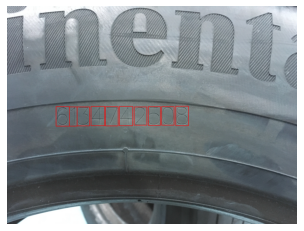

In [7]:

from google.colab.patches import cv2_imshow
print(imgs_json[0]['file_name'])
img = cv2.imread(base_path + imgs_json[0]['file_name'])
#cv2_imshow(img)
# Draw annotations
for i in anns:
  [x,y,w,h] = i['bbox']
  cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255,0,0), 5)

plt.figure()
plt.axis("off")
plt.imshow(np.asarray(img))
plt.show()




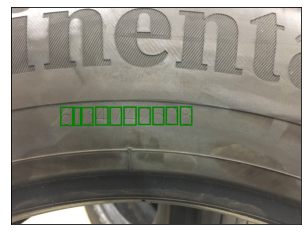

In [8]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
from torchvision.utils import draw_bounding_boxes
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
dog_int= read_image(base_path + imgs_json[0]['file_name'])

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
boxes=[]
colors = []
labels = []
for i in anns:
  [x,y,w,h] = i['bbox']
  box = [x, y, x+w, y+h]
  label = i['category_id'] - 1
  labels.append(str(label))
  boxes.append(box)
  color = "green"
  colors.append(color)
a = draw_bounding_boxes(dog_int, torch.tensor(boxes, dtype = torch.float) , colors = colors ,width=20)
  #a = a.permute(1,2,0)
string1_true = ''.join(labels)
show(a)



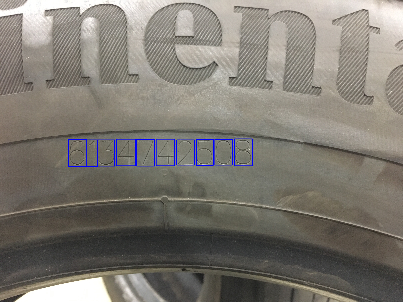

In [9]:
scale = 10
width = int(img.shape[0]/scale)
height = int(img.shape[1]/scale)
img_small = cv2.resize(img, (height, width))
cv2_imshow(img_small)

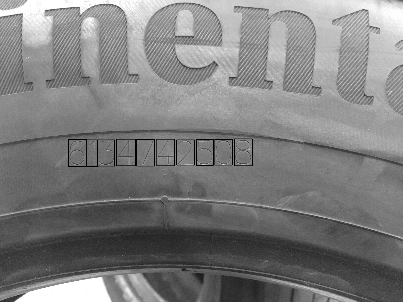

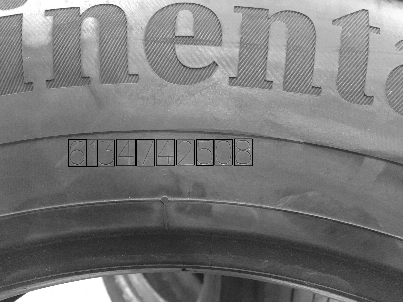

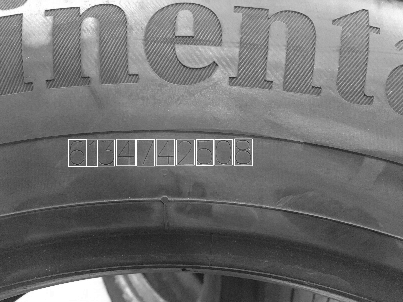

In [10]:
b, g, r = cv2.split(img_small)

cv2_imshow(r)
cv2_imshow(g)
cv2_imshow(b)

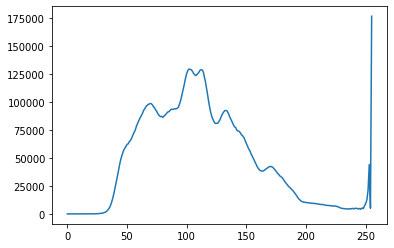

In [11]:
img_gray = cv2.imread(base_path + imgs_json[0]['file_name'], cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img_gray)
img_gray = cv2.resize(img_gray, (height, width))
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()


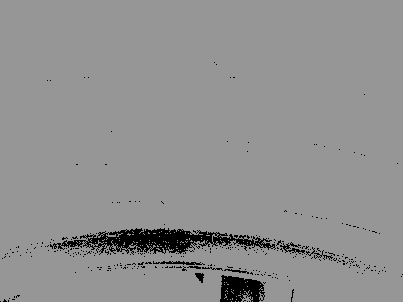

In [12]:
_, mask = cv2.threshold(img_gray, 50, 150, cv2.THRESH_BINARY)
cv2_imshow(mask)

In [13]:
#read txt
